In [18]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [19]:
# Ladataan data CSV tiedostosta
df = pd.read_csv('./work/viikko11/datasets/diabetes.csv')

# Jaetaan data opetus (X) ja tulos (y) dataan
# eli sarakkeet 0-7 opetusdataksi ja sarake 8 tulosdataksi
X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]


In [20]:
# onko null arvoja
print (f'Null values: \n{df.isnull().sum()}')

# muutetaan null nollaksi
X = X.fillna(0)


Null values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
# Jaetaan data opetus- (80%) ja testi- (20%) datoihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# skalataan data
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


In [22]:
# Luodaan malli neuroverkolle
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Käännetään malli opettamista varten
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# binary_crossentropy
# Opetetaan malli datan avulla
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))


Epoch 1/100


20/20 [==============================] - 3s 32ms/step - loss: 0.6868 - accuracy: 0.5863 - val_loss: 0.6552 - val_accuracy: 0.6948
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6915 - accuracy: 0.5977 - val_loss: 0.6464 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6833 - accuracy: 0.6107 - val_loss: 0.6421 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6739 - accuracy: 0.6319 - val_loss: 0.6380 - val_accuracy: 0.6883
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6651 - accuracy: 0.6384 - val_loss: 0.6304 - val_accuracy: 0.6883
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6518 - accuracy: 0.6629 - val_loss: 0.6196 - val_accuracy: 0.6883
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6425 - accuracy: 0.6531 - val_loss: 0.6099 - val_accuracy: 0.6948
Epoch 8/100
20/20 

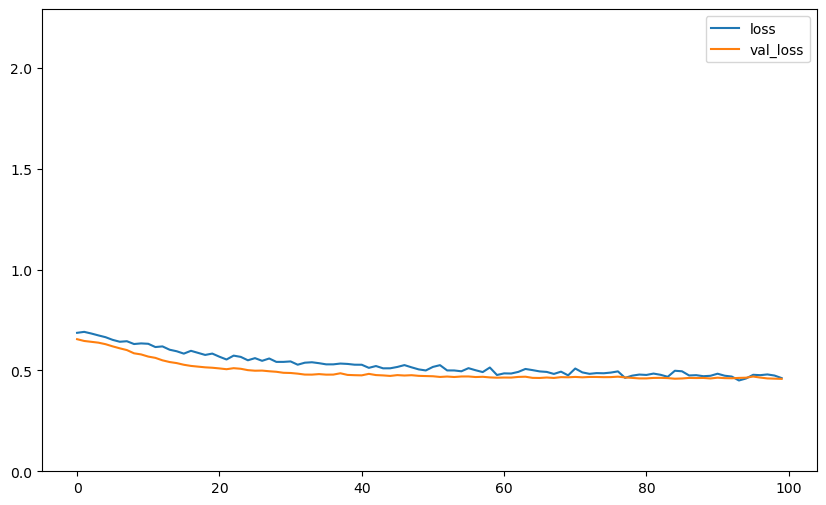

In [27]:

# Visualisoidaan mallin oppiminen
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(bottom=0, top=5 * min(history.history['val_loss']))
plt.show()



In [24]:

# Tehdään testidatalla ennusteet
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5)

5/5 [==============================] - 0s 4ms/step


In [28]:

# Tutkitaan mallin metriikoita
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print ('cm:')
print(cm)
print(f'accuracy_score: {acc}\n')
print(f'recall_score: {rs}\n')
print(f'precision_score: {ps}\n')


cm:
[[93 14]
 [17 30]]
accuracy_score: 0.7987012987012987

recall_score: 0.6382978723404256

precision_score: 0.6818181818181818



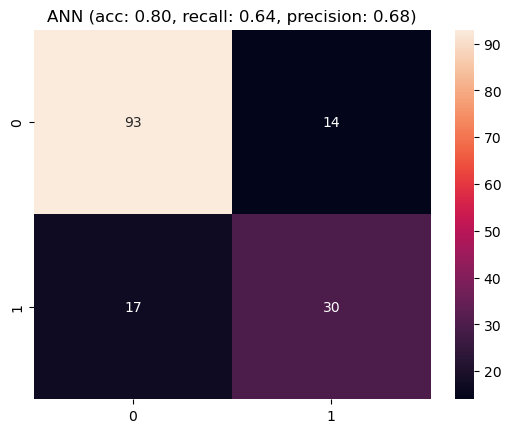

In [29]:

# Visualivoidaan confusion matrix
tn, fp, fn, tp = cm.ravel() # ravel palauttaa litistetyn taulukon
ax = plt.axes()
sns.heatmap(cm, ax = ax, annot=True, fmt='g')
ax.set_title(f'ANN (acc: {acc:.02f}, recall: {rs:.02f}, precision: {ps:.02f})')
plt.show()
